In [5]:
# -*- coding:utf-8 -*-

# 拉格朗日插值代码
# 导入数据分析库Pandas
import pandas as pd
# 导入拉格朗日插值函数
from scipy.interpolate import lagrange

# 输入数据的路径，需要使用Excel格式
input_file = 'missing_data.xls'
# 输出数据的路径，需要使用Excel格式
output_file = 'missing_data_processed.xlsx'

# 读入数据
data = pd.read_excel(input_file, header=None)
# print(data)

# 自定义列向量插值函数
# col为列向量; pos为被插值的位置; num为取前后的数据个数，默认为5。
def column_interpolation(col, pos, num=5):
   
   '''使用这行代码:
   y = s[list(range(pos - num, pos + num + 1))] 或
   y = col[list(range(pos - num, pos)) + list(range(pos + 1, pos + num + 1))]
   会报错！
   原因： Series不支持反向索引，也就是类似于pd.Series[-1]
   第一个缺失值位于第三位 pos - num 出现负值，所以报错。
   第一种解决方案: y = col.reindex(list(range(pos - num, pos)) + list(range(pos + 1, pos + num + 1)))
   第二种解决方案: 忽略 pos - num < 0 的缺失值
   '''
   # （1）取数
   y = col.reindex(list(range(pos - num, pos)) + list(range(pos + 1, pos + num + 1)))
   # （2）剔除空值
   y = y[y.notnull()]
   # （3）插值并返回插值结果
   return lagrange(y.index, list(y))(pos)

# 逐个元素判断是否需要插值
for m in data.columns:
   for n in range(len(data)):
       if(data[m].isnull())[n]:
           # 如果为空值，则插值
           data[m][n] = column_interpolation(data[m], n)

# 输出结果
data.to_excel(output_file, header=None, index=False)

C:\Users\詹耿羽\AppData\Local\Temp\ipykernel_23048\1535887725.py:43: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[m][n] = column_interpolation(data[m], n)


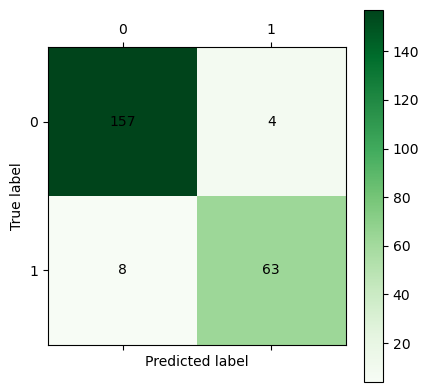

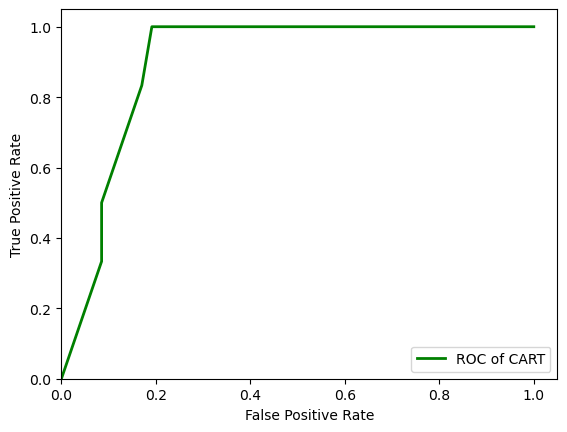

In [19]:
# -*- coding: utf-8 -*-
# 构建并测试CART决策树模型
# 导入数据分析库
import pandas as pd
# 导入随机函数shuffle，用来打算数据
from random import shuffle
import matplotlib.pyplot as plt

# 数据名
datafile = 'model.xls'
# 读取数据，数据的前三列是特征，第四列是标签
data = pd.read_excel(datafile)
# 将表格转换为矩阵
data = data.values
# 随机打乱数据
shuffle(data)
# 设置训练数据比例
p = 0.8
# 前80%为训练集
train = data[:int(len(data)*p), :]
# 后20%为测试集
test = data[int(len(data)*p):, :]


# 构建CART决策树模型
# 导入决策树模型
from sklearn.tree import DecisionTreeClassifier

# 模型输出名字
treefile = 'tree.pkl'
# 建立决策树模型
tree = DecisionTreeClassifier()
# 训练模型
tree.fit(train[:, :3], train[:, 3])
# 保存模型
# from sklearn.externals
import joblib
joblib.dump(tree, treefile)


# 导入自行编写的混淆矩阵可视化函数
def cm_plot(y, yp):  # 混淆矩阵可视化函数
    # 导入混淆矩阵函数
    from sklearn.metrics import confusion_matrix
    # 混淆矩阵
    cm = confusion_matrix(y, yp)

    # 导入作图库
    import matplotlib.pyplot as plt
    # 画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.matshow(cm, cmap=plt.cm.Greens)
    # 颜色标签
    plt.colorbar()

    for x in range(len(cm)):  # 数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    # x,y坐标轴标签
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

# 显示混淆矩阵可视化结果
cm_plot(train[:, 3], tree.predict(train[:, :3])).show()
# 注意到Scikit-Learn使用predict方法直接给出预测结果。


# 导入ROC曲线函数
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test[:, 3], tree.predict_proba(test[:, :3])[:, 1], pos_label=1)
# 作出ROC曲线
plt.plot(fpr, tpr, linewidth=2, label='ROC of CART', color='green')
# 坐标轴标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# 边界范围
plt.ylim(0, 1.05)
plt.xlim(0, 1.05)
# 图例
plt.legend(loc=4)
# 显示作图结果
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle

# 数据文件路径
datafile = 'model.xls'
# 读取数据
data = pd.read_excel(datafile)
# 将数据转为矩阵格式（注：as_matrix已被弃用，应使用.values）
data = data.values
# 随机打乱数据
shuffle(data)

# 设置训练数据比例
p = 0.8
# 前80%为训练集
train = data[:int(len(data)*p), :]
# 后20%为测试集
test = data[int(len(data)*p):, :]

# 构建LM神经网络模型
from keras.models import Sequential  # 导入神经网络初始化函数
from keras.layers.core import Dense, Activation  # 导入神经网络层函数、激活函数

# 构建的神经网络模型存储路径
netfile = 'net.model'

# 建立神经网络
net = Sequential()
# 添加输入层（3节点）到隐藏层（10节点）的连接
net.add(Dense(input_dim=3, output_dim=10))
# 隐藏层使用relu激活函数
net.add(Activation('relu'))
# 添加隐藏层（10节点）到输出层（1节点）的连接
net.add(Dense(input_dim=10, output_dim=1))
# 输出层使用sigmoid激活函数
net.add(Activation('sigmoid'))

# 编译模型，使用adam方法求解
net.compile(loss='binary_crossentropy', optimizer='adam')
# 训练模型，循环1000次
net.fit(train[:, :3], train[:, 3], nb_epoch=1000, batch_size=1)
# 保存模型
net.save_weights(netfile)

# 预测结果变形
predict_result = net.predict_classes(train[:, :3]).reshape(len(train))
'''这里要提醒的是，keras用predict给出预测概率，predict_classes才是给出预测类别，
而且两者的预测结果都是n x 1维数组，而不是通常的 1 x n'''

# 导入自行编写的混淆矩阵可视化函数
from cm_plot import *
# 显示混淆矩阵可视化结果
cm_plot(train[:, 3], predict_result).show()

# 导入ROC曲线函数
from sklearn.metrics import roc_curve
# 预测测试集结果
predict_result = net.predict(test[:, :3]).reshape(len(test))
# 计算ROC曲线数据
fpr, tpr, thresholds = roc_curve(test[:, 3], predict_result, pos_label=1)

# 作出ROC曲线
plt.plot(fpr, tpr, linewidth=2, label='ROC of LM')
# 坐标轴标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# 边界范围
plt.ylim(0, 1.05)
plt.xlim(0, 1.05)
# 图例
plt.legend(loc=4)
# 显示作图结果
plt.show()